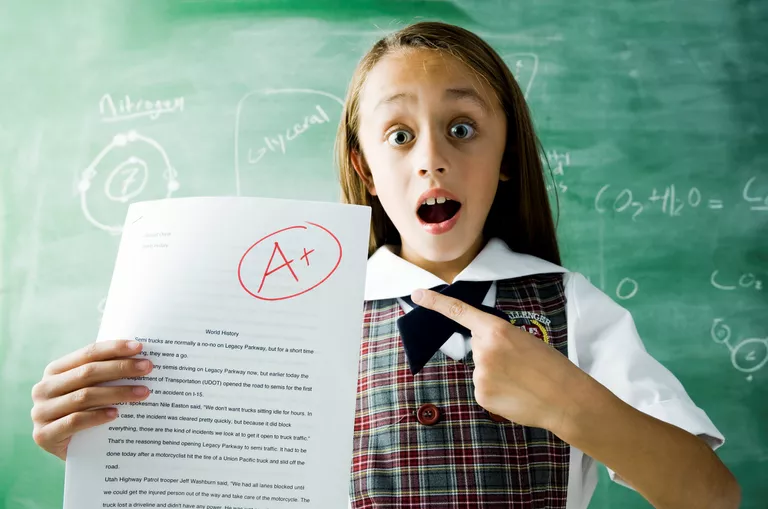

### We want to know Student's Final Grade through ML !

# Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
import pandas_profiling as pp

# Data Loading

In [2]:
data = pd.read_csv("../input/student-grade-prediction/student-mat.csv")

In [3]:
data.head()

# Variable


Attribute Information:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - score
32. G2 - score
33. G3 - socre

In [4]:
data.info()

In [5]:
import pandas_profiling as pp
pp.ProfileReport(data)

# Visualization 

In [6]:
def bar_plot(variable):
    var = data[variable]
    var_c = var.value_counts()
    
    plt.figure(figsize= (5,5))
    plt.bar(var_c.index, var_c)
    plt.ylabel('Frequency')
    plt.show()
    print("{}\n{}".format(variable, var_c))

In [7]:
categorical = data.dtypes=='object'
categorical_list = list(categorical[categorical].index)
categorical_list

for i in categorical_list:
    bar_plot(i)

---

# EDA

## Sex

In [8]:
sns.stripplot(x=data['sex'], y=data['G3'])
plt.ylabel('final Grade')
plt.show()

There are no distict diffrences between 'Sex','Final Grade'

## Age

In [9]:
#1 age's dist
sns.kdeplot(data['age'], shade=True)
plt.show()

In [10]:
sns.violinplot(data=data, x='age',y='G3')
plt.ylabel("final grade")
plt.show()

So then, Are there diffrences in score based on 'Age'+ 'Sex' ?

In [11]:
sns.stripplot(data=data, x='age',y='G3', hue='sex')
plt.show()

There are no diffrences in this visualization.

## address

In [12]:
sns.kdeplot(data.loc[data['address']== 'U', 'G3'], shade=True)
sns.kdeplot(data.loc[data['address']== 'R','G3'],shade= True)
plt.legend(data['address'].unique())
plt.show()

We can find out urban students make high scores.

I think it is inefficient to find significant with all variables, <br>
So then, I will use variables with high correlation to G3

In [13]:
numeric = data.dtypes=='int64'
numeric_list= numeric[numeric].index

In [14]:
for i in numeric_list:
    print(i ,':', np.round(data['G3'].corr(data[i]), 2))

1. Failures
2. Medu
3. Fedu

* Failures

In [15]:
plt.figure(figsize=(7,7))
sns.swarmplot(x=data['failures'], y=data['G3'],palette='Purples')
plt.show()

In [16]:
data['failures'].unique()

When failures =0 , print high scores. <br>
This shows that students with good grades consistently lead to high final grades.

---

In [17]:
plt.figure(figsize=(8,5))
family_ed = data['Fedu'] + data['Medu']
sns.boxplot(x=family_ed, y=data['G3'])
plt.ylabel('Final Grade')
plt.xlabel('Family Edu = (Fedu+Medu)')
plt.show()
sns.violinplot(x=family_ed, y=data['G3'])
plt.xlabel('Family Edu = (Fedu+Medu)')
plt.show()

* A derived variable was created and proceeded with the education level of the mother and father as the family <br>

 **There is a slight increase in Final Grade scores depending on the level of education of the family.**<br>
 There is a case where Family edu = 1, so I checked it with violinplot. Violinplot gives you an idea of ​​what it means.

# Encoding

In [18]:
categorical_list

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

def le(variable):
    le = LabelEncoder()
    le_variable = le.fit_transform(data[variable])
    data[variable] = le_variable

for i in categorical_list:
    le(i)

In [20]:
data.dtypes

# ML

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_input =data.drop(['G3'], axis=1)
data_target = data.G3

In [22]:
train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, test_size=.2)

KNN_R

In [23]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' : [1,2,3,4,5,6,7]}

In [25]:
gs = GridSearchCV(knr, param_grid= params, n_jobs=-1, cv=5)
gs.fit(train_input, train_target)
best_grid = gs.best_estimator_

In [26]:
#e.g.,
pred = best_grid.predict(test_input)
pd.DataFrame(pred, test_target)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(test_target, pred)) #평균오차
print(mean_squared_error(test_target, pred))

Dtr

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(train_input, train_target)
print(dtr.score(test_input, test_target))